<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_09/04_c_cifar10_mlp_mixer_convnext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Load & Preprocess CIFAR-10

In [1]:
import tensorflow as tf

# Load CIFAR-10 (already RGB)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train, y_test = y_train.flatten(), y_test.flatten()

# Resize to 96x96 for MobileNetV2
def preprocess(image, label):
    image = tf.image.resize(image, [96, 96])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.map(preprocess).shuffle(1000).batch(16).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.map(preprocess).batch(16).prefetch(tf.data.AUTOTUNE)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


##  Step 2: Build MobileNetV2 Classifier

In [2]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(input_shape=(96, 96, 3), include_top=False, pooling='avg', weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Step 3: Train Model

In [3]:
history = model.fit(train_ds, validation_data=test_ds, epochs=3)

Epoch 1/3
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 402s 127ms/step - accuracy: 0.6651 - loss: 0.9691 - val_accuracy: 0.7807 - val_loss: 0.6300
Epoch 2/3
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 393s 126ms/step - accuracy: 0.7675 - loss: 0.6771 - val_accuracy: 0.7981 - val_loss: 0.5890
Epoch 3/3
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 461s 132ms/step - accuracy: 0.7805 - loss: 0.6221 - val_accuracy: 0.8019 - val_loss: 0.5825


##  Step 4: Evaluate and Predict

In [4]:
loss, acc = model.evaluate(test_ds)
print(f"Test Accuracy on CIFAR-10: {acc:.2%}")


625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 103ms/step - accuracy: 0.8020 - loss: 0.5820
Test Accuracy on CIFAR-10: 80.19%


## Step 5: Visualize Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


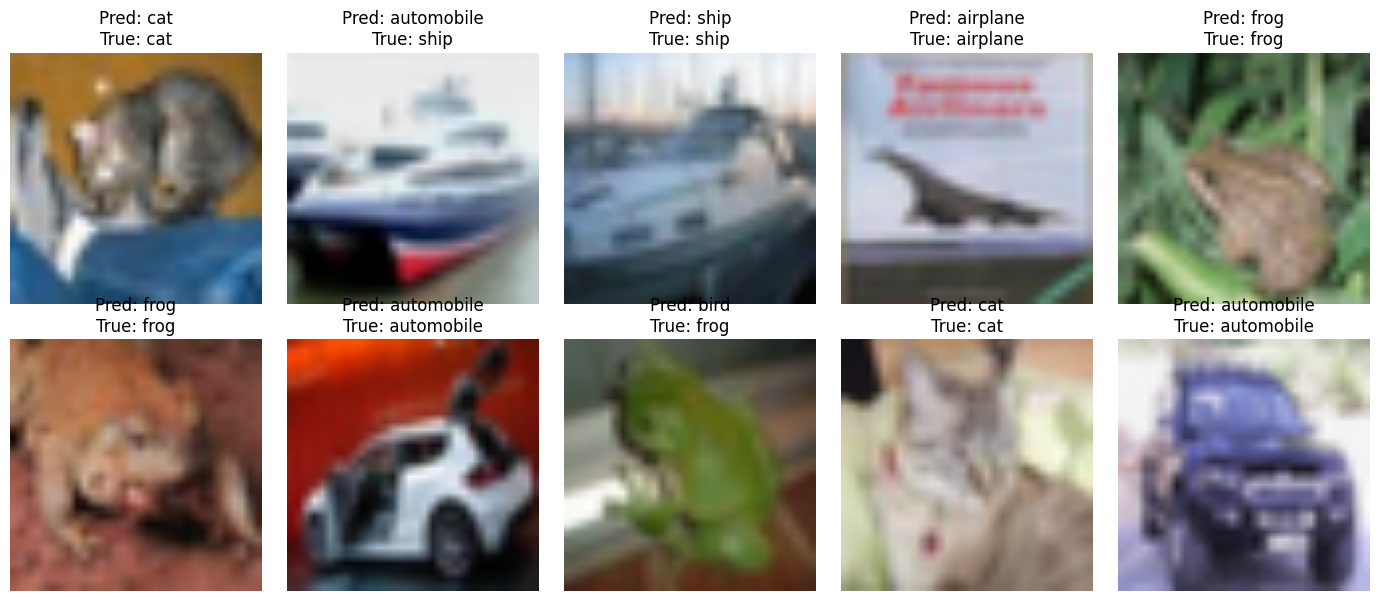

In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Get a batch from test dataset
for images, labels in test_ds.take(1):
    predictions = model.predict(images)
    pred_labels = tf.argmax(predictions, axis=1)
    break

# Plot 10 sample predictions
plt.figure(figsize=(14, 6))
rows, cols = 2, 5

for i in range(rows * cols):
    plt.subplot(rows, cols, i + 1)
    img = (images[i].numpy() * 255).astype("uint8")
    plt.imshow(img)
    plt.title(f"Pred: {class_names[pred_labels[i]]}\nTrue: {class_names[labels[i]]}")
    plt.axis("off")

plt.tight_layout()
plt.show()
